In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

# The Barabási-Albert model for generation of scale-free networks

The two major drawbacks of the Erdős-Rényi model for creating random graphs are:

1. It assumes that the size of the network is constant, but in real world network the size of the network keeps growing continuously. For example, the WWW started with a single node, but each and every day new nodes are being added to the network and today WWW contains millions of nodes.

2. Nodes in random networks randomly choose their interaction nodes but, in real world, it happens that a newly added node tends to connect with the nodes having higher degree nodes or to more connected nodes. For example, if any new paper is published on a particular domain then it is highly likely that it will have citation of the most popular paper of that particular domain. This is called preferential attachment.

So, to overcome the drawbacks of growth and preferential attachment, Barabasi came up with a model that generates scale free network which behaves like real world network. 
In this question, I have implemented the model from scratch.No libraries has been used for implementing the Barabasi model.

In [2]:
#https://www.geeksforgeeks.org/building-an-undirected-graph-and-finding-shortest-path-using-dictionaries-in-python/
#Below function calculates shortest path between source and destination nodes using BFS
def BFS_for_finding_Shortest_path(source, destination,shortest_paths,adjacency_list): 
    visited = [] 
    #storing source node in a queue
    queue = [[source]] 

    if source == destination: 
        shortest_paths.append(0)
        return 
    #checking while queue is not empty
    while queue: 
        visited_path = queue.pop(0) 
        vertex = visited_path[-1]  
        if vertex not in visited: 
            neighbouring_nodes = adjacency_list[vertex] 

            for neighbour in neighbouring_nodes: 
                new_visited_path = list(visited_path) 
                new_visited_path.append(neighbour) 
                queue.append(new_visited_path) 
                  
                # Condition to check if the neighbour node is the destination node 
                if neighbour == destination: 
                    shortest_paths.append(len(new_visited_path)-1)
                    return
            visited.append(vertex) 
    print("Path does not exists") 
    return 

The below function calculates average clustering coefficient of network. Calculating clustering coefficient of a node n = (number of edges between neighbors of the node n)/ (maximum possible edges between neighbors of node n).

In [3]:
#calculating average clustering coefficients
def Clustering_Coefficient(adjacency_list,edge_list,n):
    clustering_coeff=[]
    for i in adjacency_list:
        neighbors=adjacency_list[i]
        count=0
        n_=len(neighbors)
        max_neigh_edges=(n_*(n_-1))/2
#     print(max_neigh_edges)
        for n1 in range(len(neighbors)):
            for n2 in range(n1+1,len(neighbors)):
                if (neighbors[n1],neighbors[n2]) in edge_list or (neighbors[n2],neighbors[n1]) in edge_list:
                    count+=1
        if max_neigh_edges!=0:
            coeff=count/max_neigh_edges
            clustering_coeff.append(coeff)
    avg_cc=sum(clustering_coeff)/n
    return avg_cc

# Implementing Barabasi-Albert Model

The following steps has been followed for each of the 100 instances:

An initial random graph has been generated with 5 nodes and 10 edges such that the graph is connected. In other words the degree of each node must be atleast 1.

A matrix is created for initial graph which is named init_graph and if nodes i and j are connected then init_graph[i][j] and init_graph[j][i] is marked as 1.

Now at each evolution step, one node and m edges(I have taken m=4) are added to the existing network till the total number of nodes reach a particular value(here value=100).

For each addition of node:

4.1 Compute the degree of all the pre exisiting nodes and calculate the probability Π(k) that a link of the new node connects to node i depends on the degree ki as
Π(ki)=ki/∑jkj

where ki is the degree of ith node and summation of Kj denoted the summation of all the degrees of the pre exisiting nodes.
4.2 Calculate the cummulative sum corresponding to each pre existing node.

4.3 Generate a random number between 0-1 and see in which range the random number belongs. For example, if the random number obtained is 0.33 and cummulative sum corresponding to each pre existing node are [0.1,0.2,0.4,0.8,1.0], then as 0.33 lies between 0.2-0.4, so connect the edge from new node to either node 2 or node 3( as 0.2 is in 2nd index and 0.4 is in 4th index)

4.4 Repeat step 4.3 till all the m edges are connected.
Repeat step 4 till the total number of nodes in the network becomes 100.

After the whole network is created for one instance, its average clustering coefficient, average path length and degree distribution is plotted.

After all the 100 intances are completed, final degree distribution graph is plotted by taking mean and standard deviation.

In [4]:
final_degree_list=[] #stores average degrees for all 100 instances
final_avg_clust_coeff=[]  #stores average clustering coefficients for all 100 instances
final_avg_path_length=[]  #stores average path length for all 100 instances
for instance in range(100):
    print("Instance= ", instance)
    nodes=5 #taking 5 nodes for creating initial network
    edges=10 #taking 10 edges for creating initial network
    e=0
    init_graph=np.zeros((nodes,nodes))
    while(e<edges):
        for i in range(nodes):
            #choosing a random node
            val=random.randint(0,nodes-1)
        #checking for self loop
            if val!=i:
                init_graph[i][val]=1
                init_graph[val][i]=1
                e=e+1
        # if all the edges are taken and attached then the loop will end
            if e==edges:
                break
    total_nodes=100 #total number of nodes considered for each instance
    new_edges=4 # number of edges that are added in each evolution stage
    while(nodes!=total_nodes): # loop for each evolution step till the network contains 200 nodes
#     print(init_graph) 
        degree_dict={}
#degree_dict contains degrees of every node
        c=0
        degrees=[]
        for i in init_graph:
#to calculate degree of each node counting the number of 1s in each row
            deg=list(i).count(1)
            degrees.append(deg)
            degree_dict[c]=deg
            c=c+1
#calculating summation of degrees of all the existing nodes
        summation_of_deg=sum(degree_dict.values())
        prob_dict={}
        prob_temp=[]
# each index of prob_dict contains the probabilty=(degree of ith node)/(summation of degree of all the nodes) for each node
        for d in degree_dict:
            prob=degree_dict[d]/summation_of_deg
            prob_dict[d]=prob
            prob_temp.append(prob)
        cummulative_prob=[]
#cummulative_prob contains cummulative degrees of each existing node
        s=0
        for i in range(len(prob_temp)):
            s=s+prob_temp[i]
            cummulative_prob.append(s)
#     print(cummulative_prob)
        #adding a new node
        #to Add a new node I am adding one row and one column with values 0 in the existing graph
        new_col = [0]*len(init_graph[0])
        init_graph = np.column_stack((init_graph, new_col))
        new_row = [0]*len(init_graph[0])
        init_graph = np.vstack ((init_graph, new_row))
        new_node_index=len(init_graph)-1
        count=0
#adding new edges to the network
        while(count<new_edges):
            new_index=0
            v=random.uniform(0,1)
            if v<cummulative_prob[0]:
                new_index=0
            else:
                for r in range(1,len(cummulative_prob)-1):
                #if random value lies between ith and (i+1)th index then edge will be added to (i+1)th node
                    if v>cummulative_prob[r] and v<cummulative_prob[r+1]:
                        new_index=r+1
#                     print(v,r+1,cummulative_prob[r+1])
                        break
            if(init_graph[new_node_index][new_index]!=1):
                init_graph[new_node_index][new_index]=1
                init_graph[new_index][new_node_index]=1
                count=count+1
#             new_edges+=1
        nodes=nodes+1
    edge_list=[]
# edge list contains all the edge pairs of the final network
    for i in range(len(init_graph)):
        for j in range(len(init_graph)):
            if(init_graph[i][j]==1):
                edge_list.append((i,j))
    adjacency_list={} #contains neighbors of each node
    it=0
    for row in init_graph:
        temp=[]
        for v in range(len(row)):
            if row[v]==1:
                temp.append(v)
        adjacency_list[it]=temp
        it+=1
    path_length=[] #stores path length for final network
    cc1=Clustering_Coefficient(adjacency_list,edge_list,total_nodes)
    print("average clustering coeff for instance = ",instance, " is: ", cc1)
    node_list=[]
    for a in adjacency_list:
        node_list.append(a)
    for i in range(len(node_list)):
        for j in range(i+1,len(node_list)):
            BFS_for_finding_Shortest_path(node_list[i], node_list[j],path_length,adjacency_list)
    total_edges1=(total_nodes*(total_nodes-1))/2
    pl1=sum(path_length)/total_edges1
#     print("average path length for instance" ,instance," is: ", pl1)
    final_avg_path_length.append(pl1)
    final_avg_clust_coeff.append(cc1)
    degrees=[]
#degree corresponding to each node
    degree_dict={}
    c=0
    for i in init_graph:
        deg=list(i).count(1) #calculating degree of a node by counting 1s in its correspnding row
        degrees.append(deg)
        degree_dict[c]=deg
        c=c+1
    print("Average degree of the network is :",sum(degrees)/total_nodes)
    degree_distribution1={} 
    for degree in degrees:
        if degree not in degree_distribution1.keys():
            pro=degrees.count(degree)/total_nodes
            degree_distribution1[degree]=pro
    print("Maximum degree is: ",max(degrees))
    print("Minimum degree is: ",min(degrees))
    #plotting degree distribution
#     plot_x=list(degree_distribution1.keys())
#     plot_y=list(degree_distribution1.values())
    final_degree_list.append(degree_distribution1)
#     indexes=np.argsort(plot_x)
#     x,y=[],[]

#     for index in indexes:
#         x.append(plot_x[index])
#         y.append(plot_y[index])
#     plt.figure()
#     plt.title(" Degree distribution")
#     plt.xlabel("degree")
#     plt.ylabel("P(degree)")
#     plt.scatter(x, y,c='green',label='P(degree)')
#     plt.legend()
#     plt.show()

Instance=  0
average clustering coeff for instance =  0  is:  0.17247277715539258
Average degree of the network is : 7.74
Maximum degree is:  38
Minimum degree is:  3
Instance=  1
average clustering coeff for instance =  1  is:  0.19377449195064902
Average degree of the network is : 7.72
Maximum degree is:  42
Minimum degree is:  3
Instance=  2
average clustering coeff for instance =  2  is:  0.18957690166649566
Average degree of the network is : 7.74
Maximum degree is:  44
Minimum degree is:  3
Instance=  3
average clustering coeff for instance =  3  is:  0.20501762085004216
Average degree of the network is : 7.74
Maximum degree is:  43
Minimum degree is:  2
Instance=  4
average clustering coeff for instance =  4  is:  0.16803240402854208
Average degree of the network is : 7.76
Maximum degree is:  33
Minimum degree is:  3
Instance=  5
average clustering coeff for instance =  5  is:  0.13253847004911742
Average degree of the network is : 7.7
Maximum degree is:  25
Minimum degree is:  3

In [5]:
print("Average Clustering Coefficient of all 100 instances is: ", np.mean(final_avg_clust_coeff))
print("Average path length of all 100 instances is: ", np.mean(final_avg_path_length))

Average Clustering Coefficient of all 100 instances is:  0.18750819559433374
Average path length of all 100 instances is:  2.3510141414141414


In [39]:
scaled_mean_degree={}
for i in range(50):
    temp=[]
    for dict1 in final_degree_list:
        if i in dict1:
            temp.append(dict1[i])
    if len(temp)!=0:
        scaled_mean_degree[i]=np.mean(temp)
    else:
        scaled_mean_degree[i]=0
        

In [40]:
scaled_std_deviation={}
for i in range(50):
    temp=[]
    for dict1 in final_degree_list:
        if i in dict1:
            temp.append(dict1[i])
    if len(temp)!=0:
        scaled_std_deviation[i]=np.std(temp)
    else:
        scaled_std_deviation[i]=0
        


# Plotting degree distribution

We can see from the graph that the model follows power law distribution.This happen due to rich gets richer phenomena. In other words, when a new node is added to a network, it is more likely to connect to a high-degree node than an obscure, low-degree node. The rich get richer and the hubs get hubbier.

Most of the nodes have smaller degree and only few nodes(called hubs) will have very high degree due to preferetial attachment. This is why we are getting power law degree distribution.

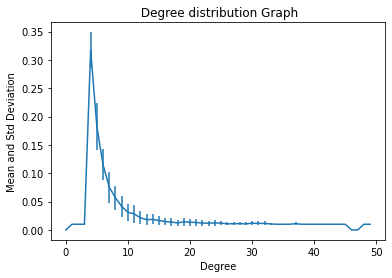

In [41]:
# example data 
x=[]
for i in range(50):
    x.append(i)
xval = scaled_mean_degree.values()
yval = scaled_std_deviation.values() 

plt.errorbar(x, scaled_mean_degree.values(), yerr = scaled_std_deviation.values() )
plt.title(" Degree distribution Graph")
plt.xlabel("Degree")
plt.ylabel("Mean and Std Deviation")

plt.show() 

<b> Plotting log scale</b>

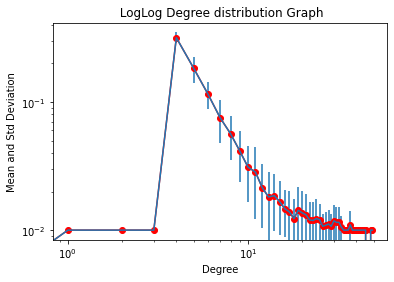

In [42]:
x=[]
for i in range(50):
    x.append(i)
xval1 = scaled_mean_degree.values()
xval=[]

for i in xval1:
    xval.append(i)
yval = scaled_std_deviation.values() 
plt.loglog(x,xval  ,'ro-') 

plt.errorbar(x, scaled_mean_degree.values(), yerr = scaled_std_deviation.values() )
plt.title(" LogLog Degree distribution Graph")
plt.xlabel("Degree")
plt.ylabel("Mean and Std Deviation")

# plt.xscale("loglog")
plt.show() 